In [1]:
import pandas as pd
import numpy as np

In [12]:
data=pd.read_csv(r'C:\Users\Bhaskar\diabetes.csv')

In [13]:
data.shape

(768, 9)

In [14]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [15]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
datacpy=data.copy()

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

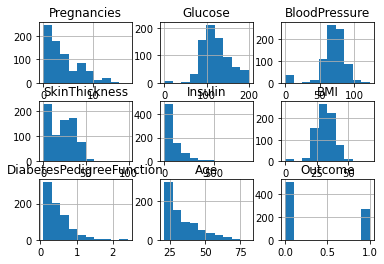

In [17]:
data.hist()

In [18]:
for col in data.columns:
    if col != 'Outcome':
        data[col]=np.log2(data[col])
        
    

C:\Users\Bhaskar\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [21]:
data=datacpy.copy()

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

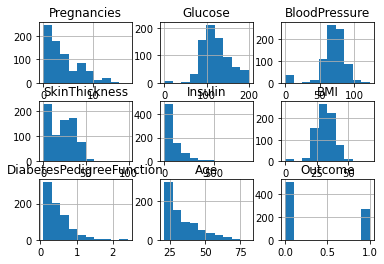

In [22]:
data.hist()

In [23]:
for col in data.columns:
    if col != 'Outcome':
        data[col]=np.sqrt(data[col])

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

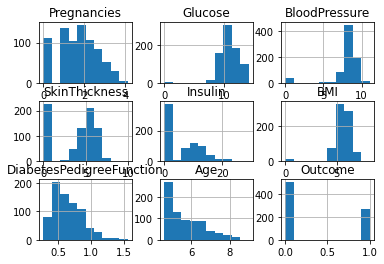

In [24]:
data.hist()

In [25]:
data_dummies=pd.get_dummies(data)

In [26]:
data_dummies.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2.449490,12.165525,8.485281,5.916080,0.000000,5.796551,0.791833,7.071068,1
1,1.000000,9.219544,8.124038,5.385165,0.000000,5.157519,0.592453,5.567764,0
2,2.828427,13.527749,8.000000,0.000000,0.000000,4.827007,0.819756,5.656854,1
3,1.000000,9.433981,8.124038,4.795832,9.695360,5.300943,0.408656,4.582576,0
4,0.000000,11.704700,6.324555,5.916080,12.961481,6.565059,1.512614,5.744563,1


In [47]:
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,cross_val_predict,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [62]:
gd_class=GradientBoostingClassifier(n_estimators=50,loss='deviance',learning_rate=0.1,criterion='friedman',max_depth=5,random_state=10)

In [63]:
model=[]
model.append(('GBM',gd_class))

In [64]:
def eval_metrics(target,prob,threshold):
        """ target =y_yest,prob=logistic.predict(X_test),Threshold =Cutoff Threshold """
        data=pd.DataFrame()
        data['pred_proba'] = pd.Series(prob)
        data['pred'] = data['pred_proba'].map(lambda x: 1.0 if x > threshold else 0.0)
        accuracy=metrics.accuracy_score(target,data['pred'])
        precision= metrics.precision_score(target,data['pred'])
        recall= metrics.recall_score(target,data['pred'])
        f1_score = metrics.f1_score(target,data['pred'])
        roc_auc = metrics.roc_auc_score(target,data['pred'])
        return(accuracy,precision,recall,f1_score,roc_auc)

In [65]:
def feature_importance_plot(features,importance,nameofmodel):
    print("Fature importance of" ,nameofmodel)
    sorted_index=np.argsort(importance)
    plt.figure(figsize=(15,5))
    sns.barplot(x = features[sorted_index], y = importance[sorted_index],)
    plt.show()

In [66]:
param_grid={
    'GBM':{
        'n_estimators':[100,150,200],
        'loss':['deviance','exponential'],
        'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
        'max_depth':[3,5,6]
    }
}

In [67]:
def Model_Building_Phase(dataset,target_column,models_list,th,gridsearch=False,cv_validation=False):# defining the fuction to AUtomate modle Building
     #Independent and Dependent Variabls
    X=dataset.drop([target_column],axis=1)
    Y=dataset[[target_column]]
    
    #Test and train split
    X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=1)
   
   
    # fitting Model
    col_names = ['Algorithm', 'Accuracy','Precison','Recall','f1-score','AUC-ROC']
    results_final = pd.DataFrame(columns=col_names)
    i = 0
    for name,model in models_list:
        print("model",name)
        
        model.fit(X_train, y_train)
        # predictions on testing data 
        pred_test = model.predict_proba(X_test)[:,1]
       
        #Evaluation Metrics for the model built
        accuracy,precision,recall,f1_score,roc_auc=eval_metrics(y_test,pred_test,th)
        results_final.loc[i]=[name,accuracy,precision,recall,f1_score,roc_auc]
        i += 1
        #Plotting Feature importance 
#         try:
#             feature_importance_plot(X_train.columns,model.feature_importances_,name)
#         except:
#             print(name +" has no Feature importance")
#             continue
    
        # Grid Search 
        if gridsearch:
            Hyper_parameter_tuning(name,model,X_train,y_train)
            
        
               
        #Applying k-Fold Cross Validation           
        if cv_validation:
            score_cv = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10,scoring='accuracy')
            print(" K fold Cross validation scores",score_cv)
            print("Mean of K fold cross validation ",score_cv.mean())
       
   
    return(results_final)
        

In [68]:
Model_Building_Phase(data, 'Outcome', model, th=0.5, gridsearch=False, cv_validation=False)

model GBM


C:\Users\Bhaskar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


KeyError: 'friedman'